**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: LINETH GUERRA
*   MATRÍCULA: A01795639

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/data science"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
#estadísticas descriptica para variables númericas
numerica = data_df.describe()
print("Estadística descriptiva para variables númericas:")
display(numerica)
#estadísticas descriptiva para variables categoricas
categoricas = data_df.describe(include='object')
print("Estadística descriptiva para varibales categoricas:")
display(categoricas)

Estadística descriptiva para variables númericas:


radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Estadística descriptiva para varibales categoricas:


diagnosis
count        569
unique         2
top            B
freq         357

1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
data_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [ ]:
#la variable diagnosis contiene dos valores unicos
data_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

1c) Búsqueda de valores faltantes.

In [ ]:
data_df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

<ipython-input-10-4fe945db7634>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette=['dodgerblue','red'])


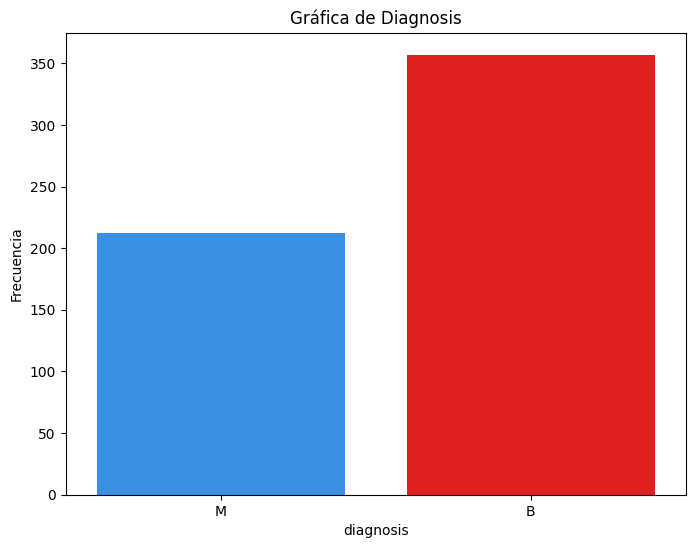

In [ ]:
columns = data_df.describe(include='object')
plt.figure(figsize=(8,6))

for column in columns:
    sns.countplot(x=data_df[column], palette=['dodgerblue','red'])
    plt.title(f'Gráfica de {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

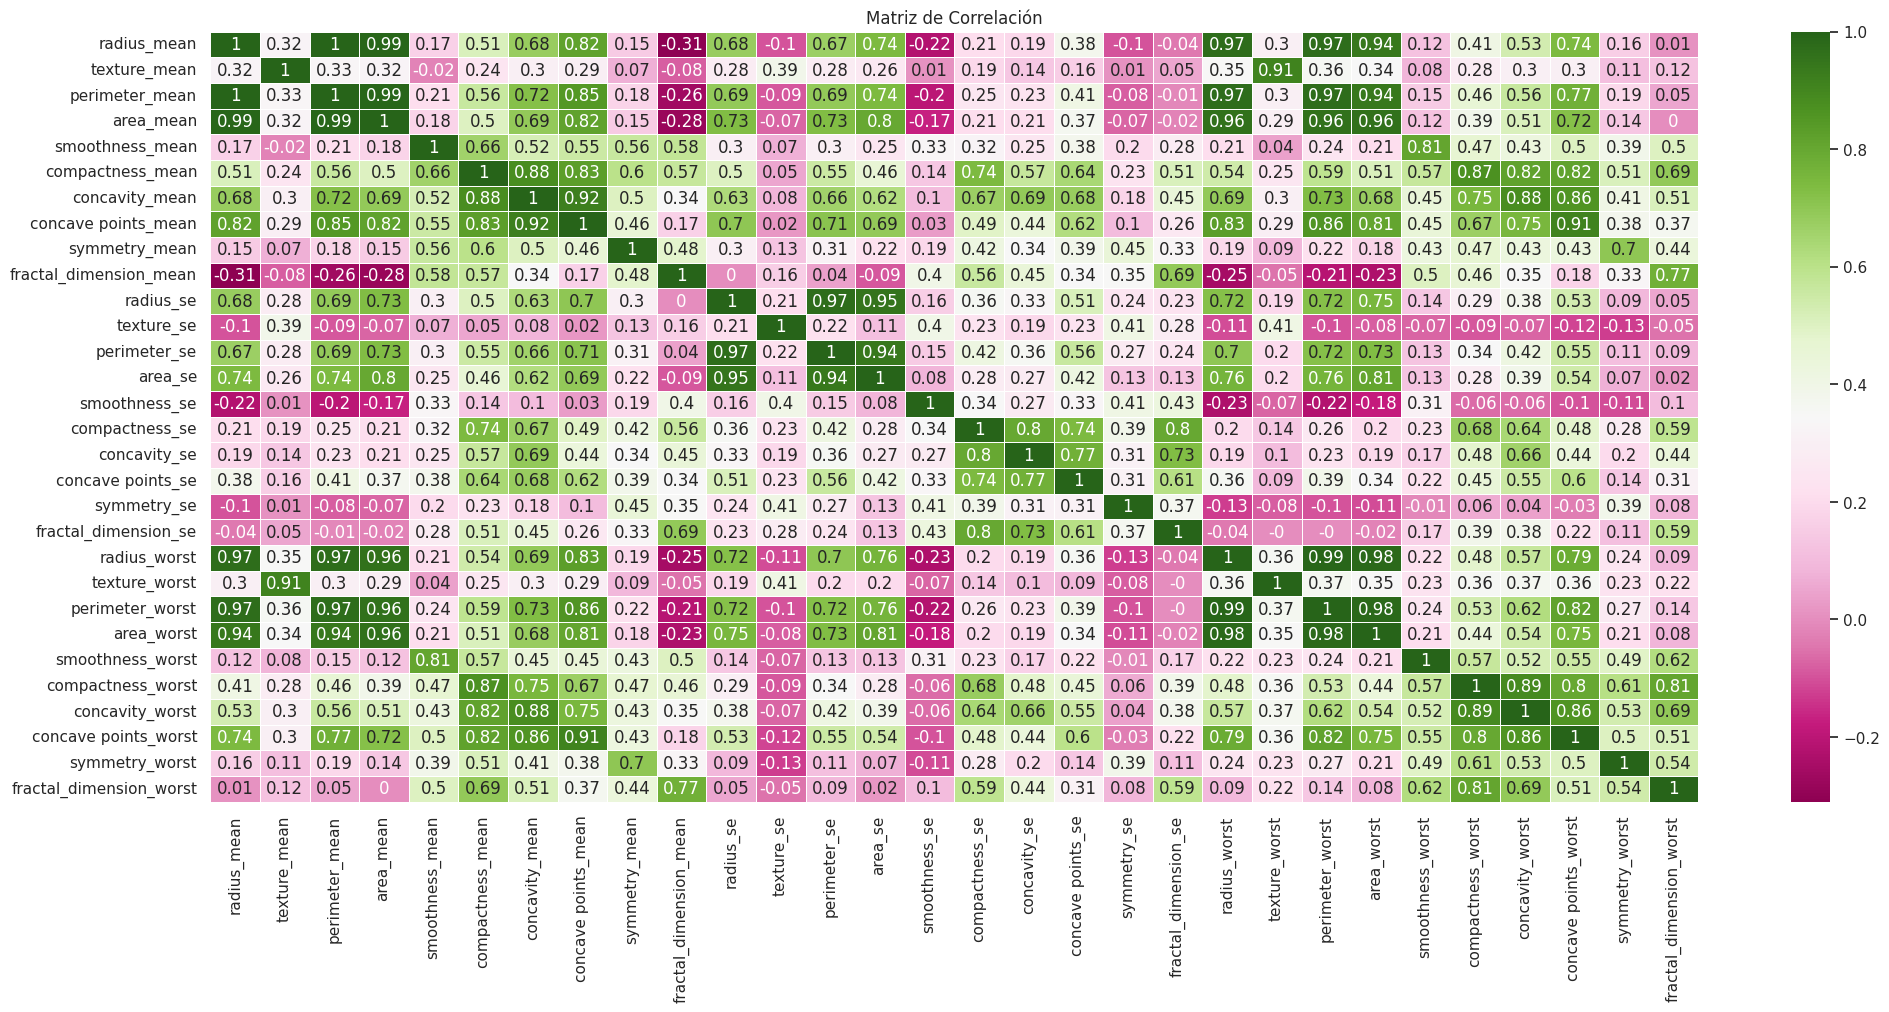

In [ ]:
#seleccionamos la variables númericas para elaborar el mapa de calor
columns = data_df.select_dtypes(include = np.number)
#calculamos la matriz para la correlación
correlacion = columns.corr().round(2)
# Configurar el estilo de Seaborn
sns.set(style="white")
# Crear el heatmap
plt.figure(figsize=(24, 10))
sns.heatmap(correlacion, annot=True, cmap='PiYG', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

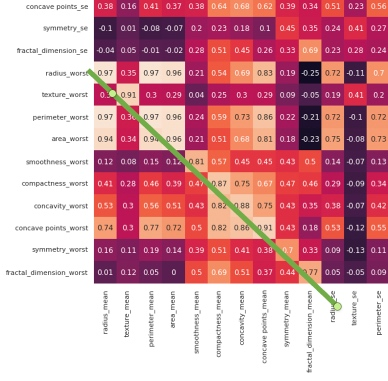

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
data_df = data_df.drop(columns=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                      'concavity_worst','concave points_worst','symmetry_worst', 'fractal_dimension_worst'], axis = 1)
data_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_se  texture_se  \
id                                            ...                          
842302                0.14710         0.2419  ...     1.0950      0.9053   
842517                0.07017         0.1812  ...     0.5435      0.7339   
84300903              0.12790         0.2069  ...     0.7456      0.7869   
84348301              0.10520         0.2597  ...     0.4956      1.1560   
84358402              0.10430         0.1809  ...     0.7572      0.7813   
...                       ...            ...  ...        ...         ...   
926424                0.13890         0.1726  ...     1.1760      1.2560   
926682                0.09791         0.1752  ...     0.7655      2.4630   
926954                0.05302         0.1590  ...     0.4564      1.0750   
927241                0.15200         0.2397  ...     0.7260      1.5950   
92751                 0.00000         0.1587  ...     0.3857      1.4280   

          perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
id                                                                             
842302           8.589   153.40       0.006399         0.04904       0.05373   
842517           3.398    74.08       0.005225         0.01308       0.01860   
84300903         4.585    94.03       0.006150         0.04006       0.03832   
84348301         3.445    27.23       0.009110         0.07458       0.05661   
84358402         5.438    94.44       0.011490         0.02461       0.05688   
...                ...      ...            ...             ...           ...   
926424           7.673   158.70       0.010300         0.02891       0.05198   
926682           5.203    99.04       0.005769         0.02423       0.03950   
926954           3.425    48.55       0.005903         0.03731       0.04730   
927241           5.772    86.22       0.006522         0.06158       0.07117   
92751            2.548    19.15       0.007189         0.00466       0.00000   

          concave points_se  symmetry_se  fractal_dimension_se  
id                                                              
842302              0.01587      0.03003

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




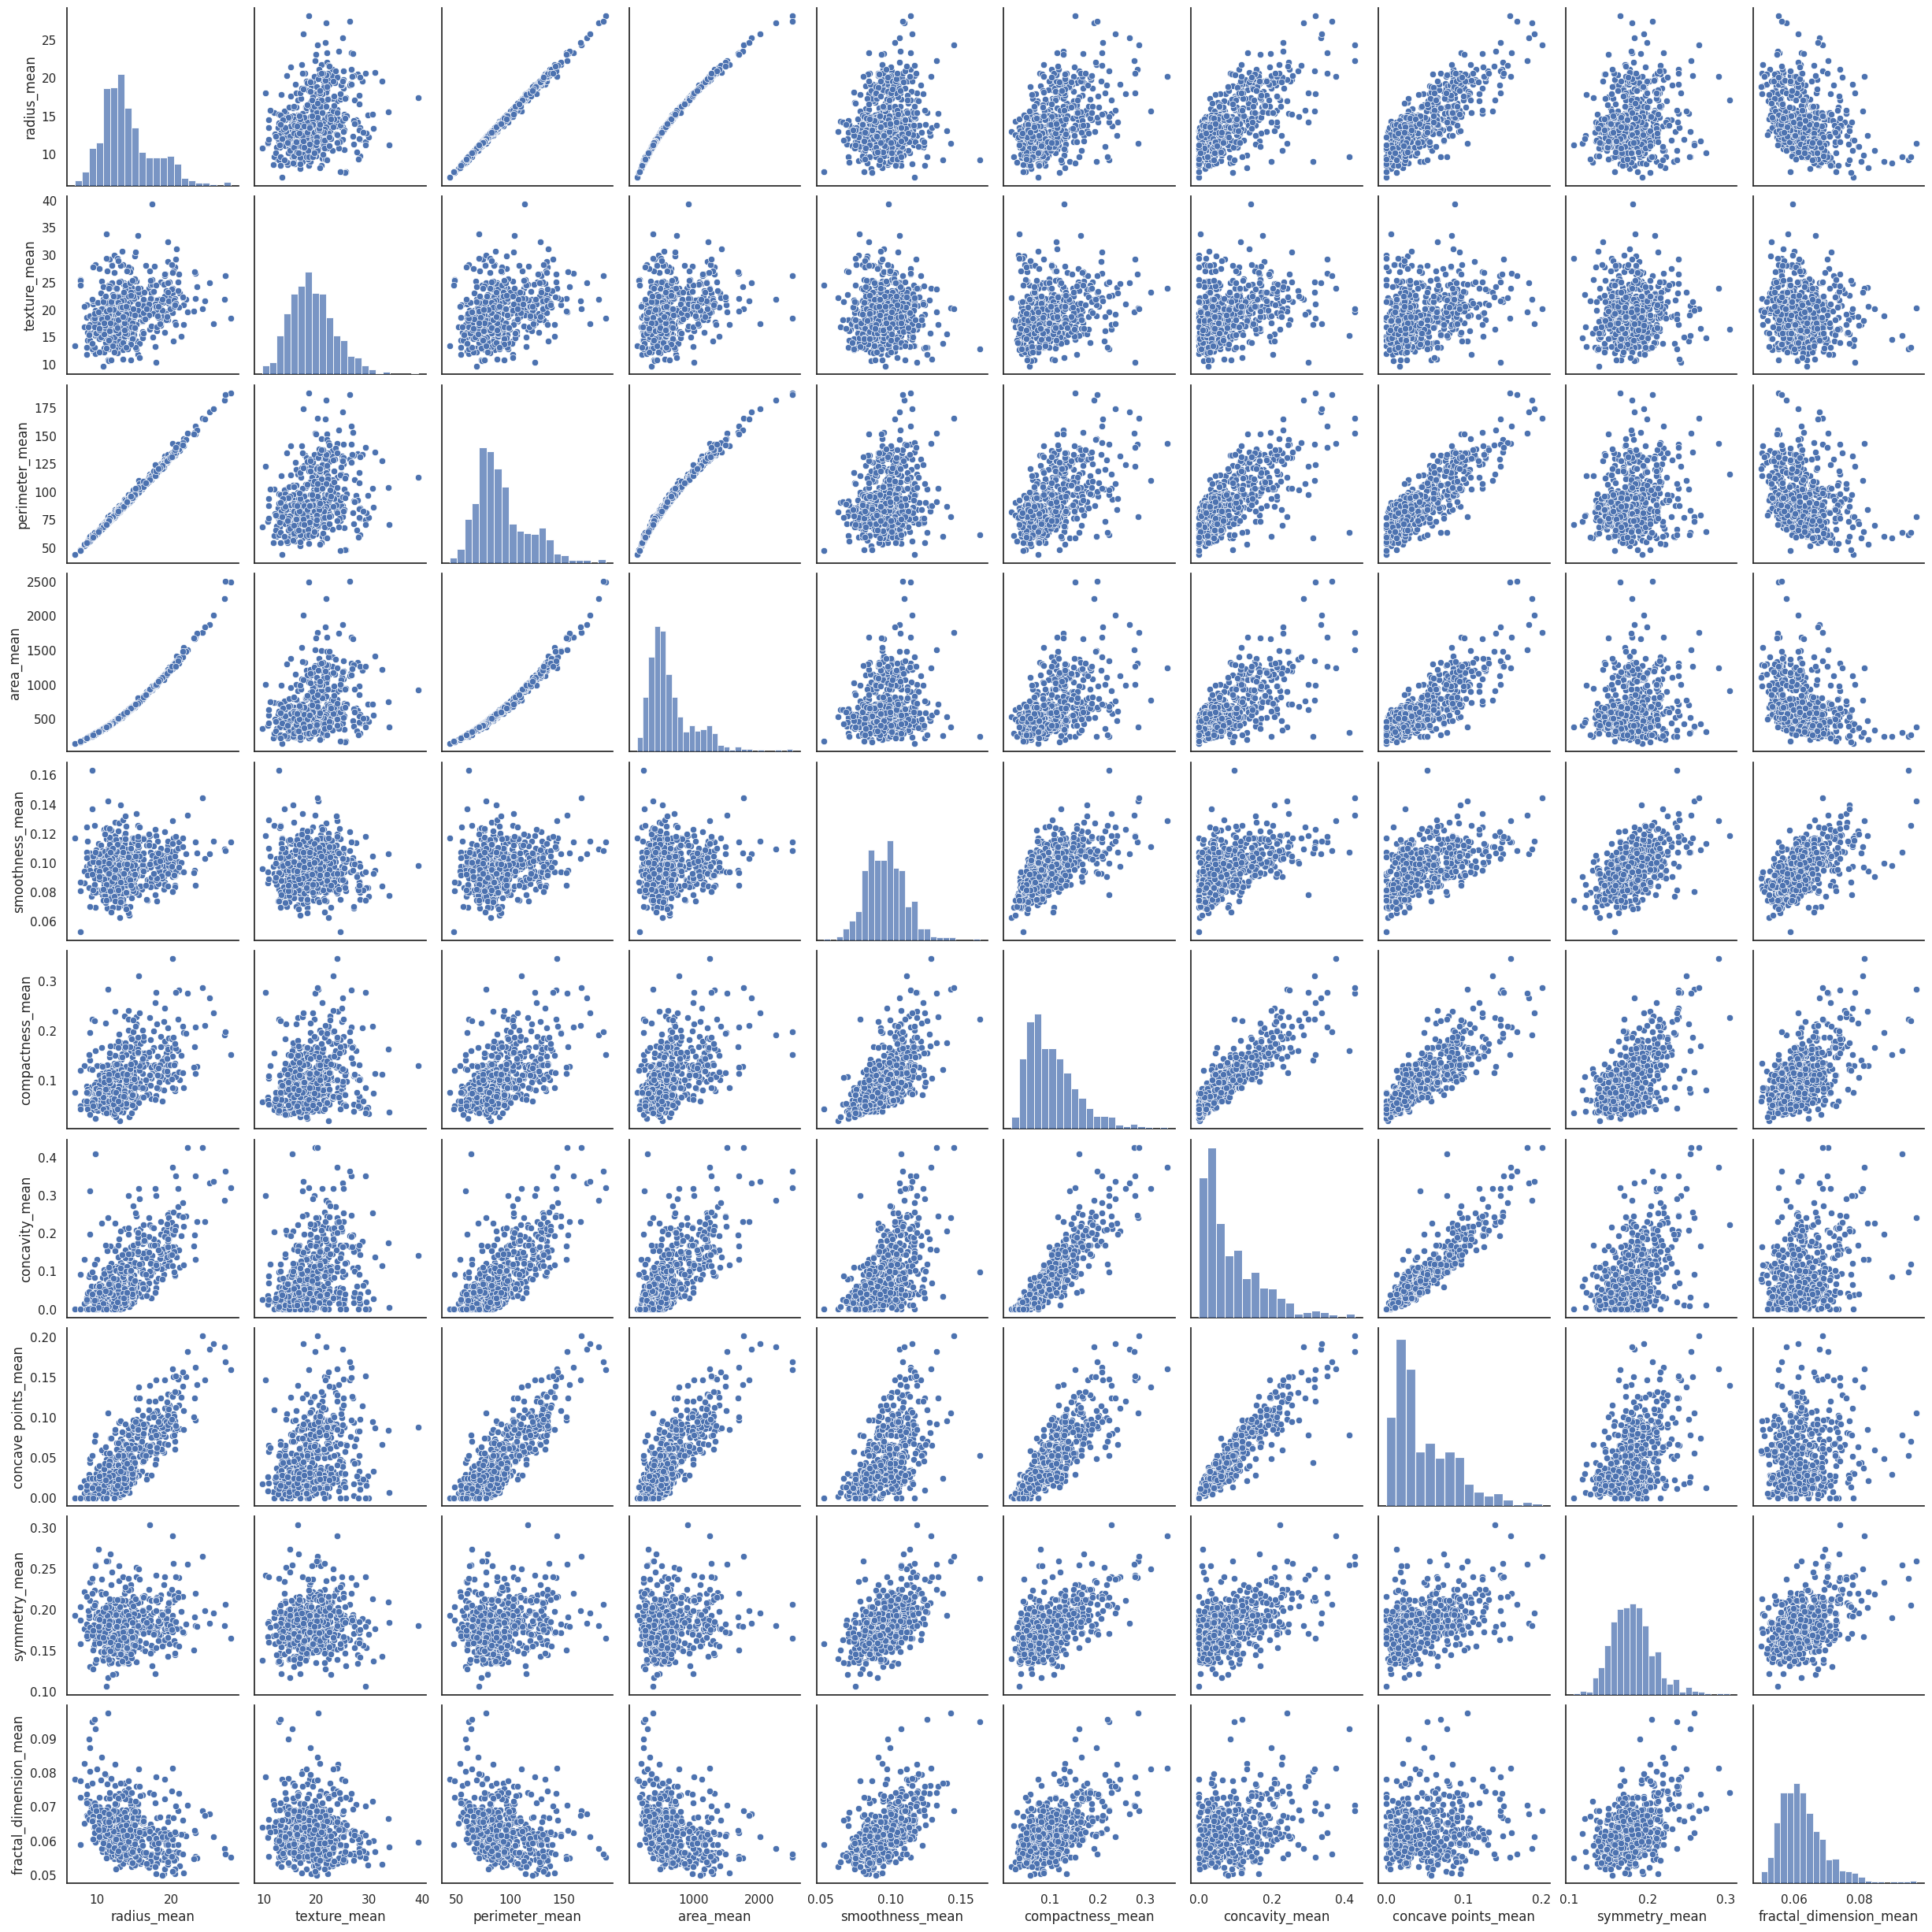

In [ ]:
sns.pairplot(data=data_df[['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean',
                           'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


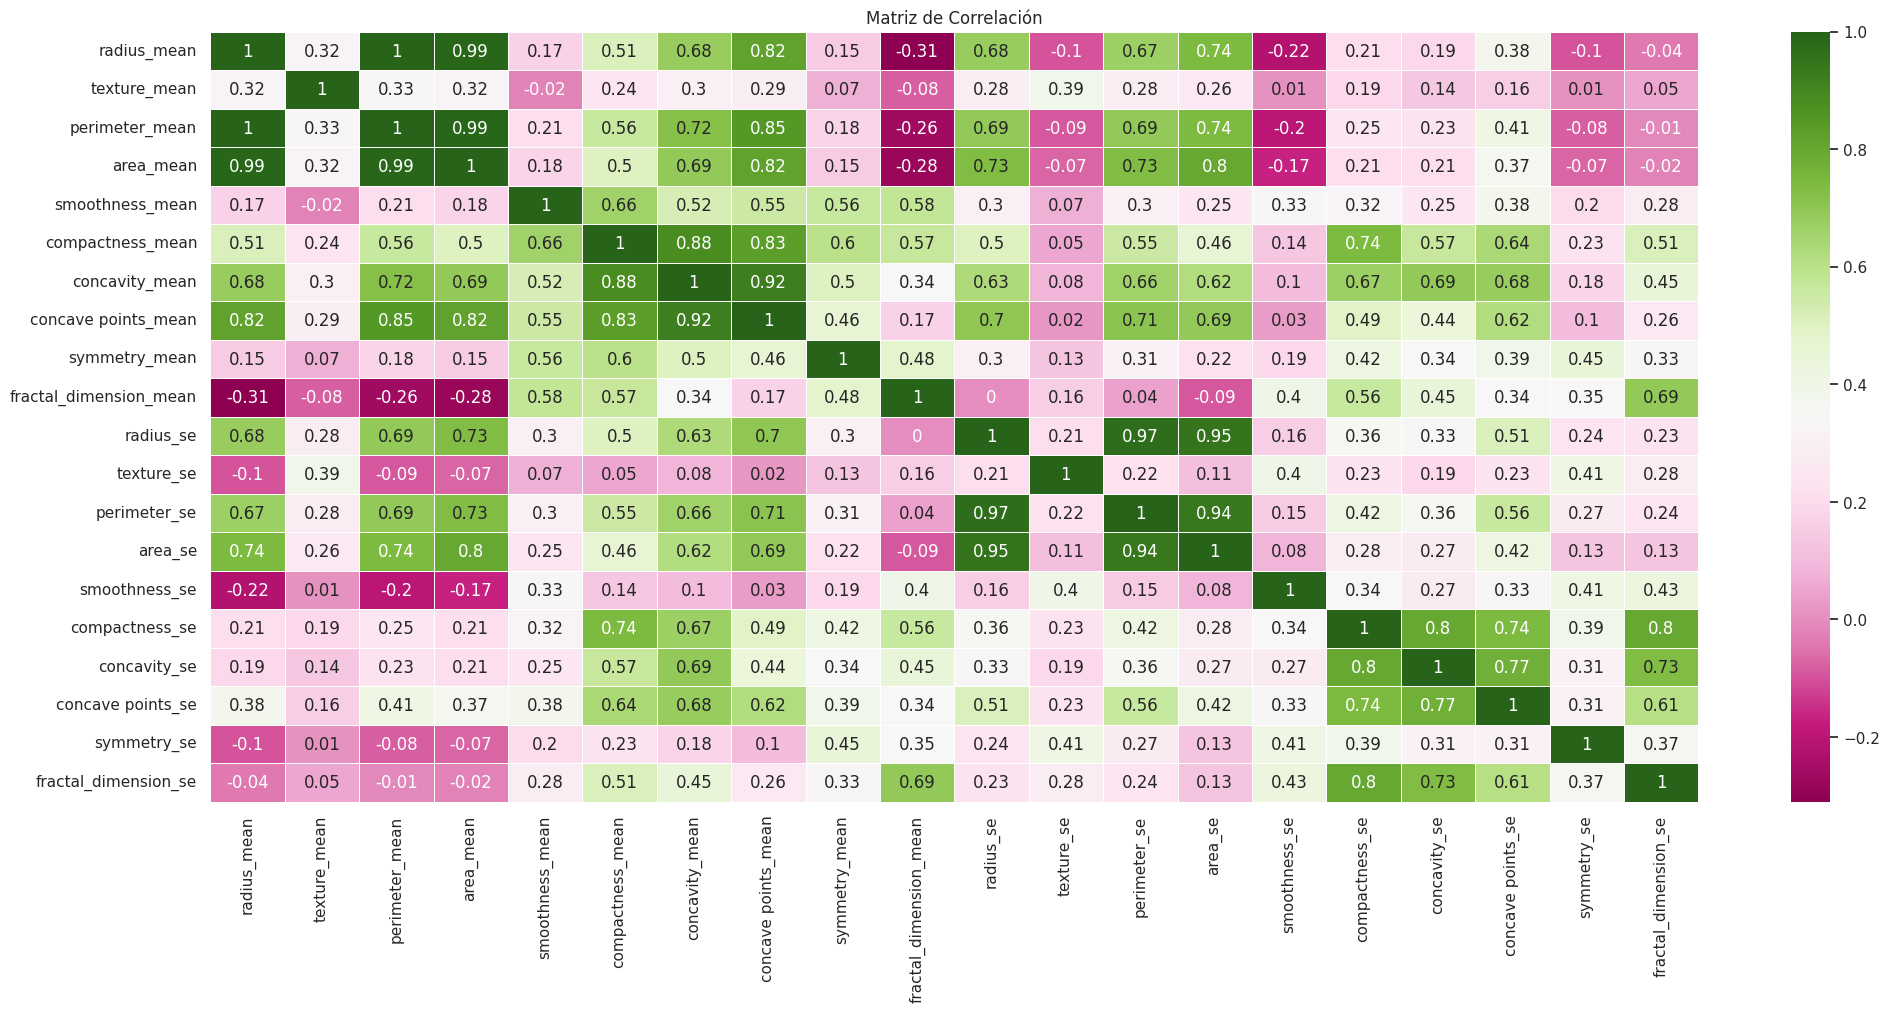

In [ ]:
#seleccionamos la variables númericas para elaborar el mapa de calor
data_df = data_df.select_dtypes(include = np.number)
#calculamos la matriz para la correlación
correlacion = data_df.corr().round(2)
# Configurar el estilo de Seaborn
sns.set(style="white")
# Crear el heatmap
plt.figure(figsize=(24, 10))
sns.heatmap(correlacion, annot=True, cmap='PiYG', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
data_df = data_df.drop(columns= ['perimeter_mean', 'area_mean', 'concavity_mean','concave points_mean',
                                 'perimeter_se', 'area_se', 'concavity_se','concave points_se'], axis=1)

In [ ]:
data_df

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
id                                                                       
842302          17.99         10.38          0.11840           0.27760   
842517          20.57         17.77          0.08474           0.07864   
84300903        19.69         21.25          0.10960           0.15990   
84348301        11.42         20.38          0.14250           0.28390   
84358402        20.29         14.34          0.10030           0.13280   
...               ...           ...              ...               ...   
926424          21.56         22.39          0.11100           0.11590   
926682          20.13         28.25          0.09780           0.10340   
926954          16.60         28.08          0.08455           0.10230   
927241          20.60         29.33          0.11780           0.27700   
92751            7.76         24.54          0.05263           0.04362   

          symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
id                                                                       
842302           0.2419                 0.07871     1.0950      0.9053   
842517           0.1812                 0.05667     0.5435      0.7339   
84300903         0.2069                 0.05999     0.7456      0.7869   
84348301         0.2597                 0.09744     0.4956      1.1560   
84358402         0.1809                 0.05883     0.7572      0.7813   
...                 ...                     ...        ...         ...   
926424           0.1726                 0.05623     1.1760      1.2560   
926682           0.1752                 0.05533     0.7655      2.4630   
926954           0.1590                 0.05648     0.4564      1.0750   
927241           0.2397                 0.07016     0.7260      1.5950   
92751            0.1587                 0.05884     0.3857      1.4280   

          smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
id                                                                          
842302         0.006399         0.04904      0.03003              0.006193  
842517         0.005225         0.01308      0.01389              0.003532  
84300903       0.006150         0.04006      0.02250              0.004571  
84348301       0.009110         0.07458      0.05963              0.009208  
84358402       0.011490         0.02461      0.01756              0.005115  
...                 ...             ...          ...                   ...  
926424         0.010300         0.02891      0.01114              0.004239  
926682         0.005769         0.02423      0.01898              0.002498  
926954         0.005903         0.03731      0.01318              0.003892  
927241         0.006522         0.06158      0.02324              0.006185  
92751          0.007189         0.00466      0.02676              0.002783  

[569 rows x 12 columns]

Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

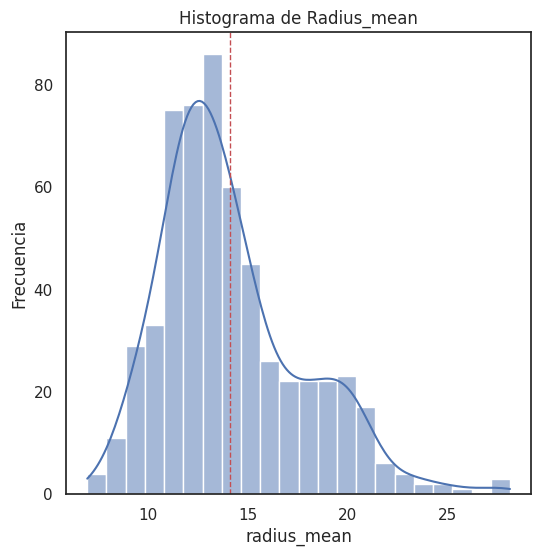

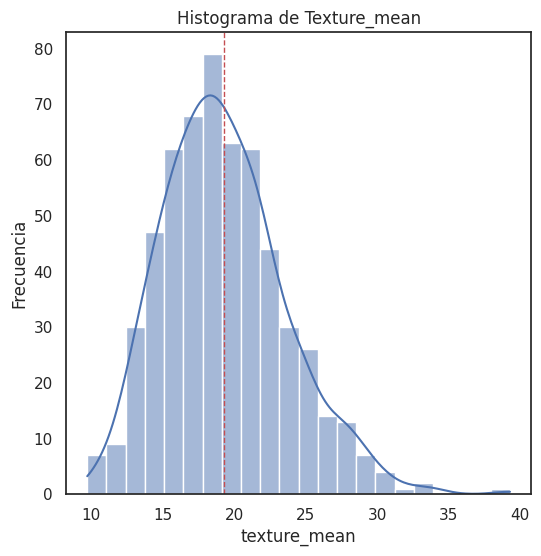

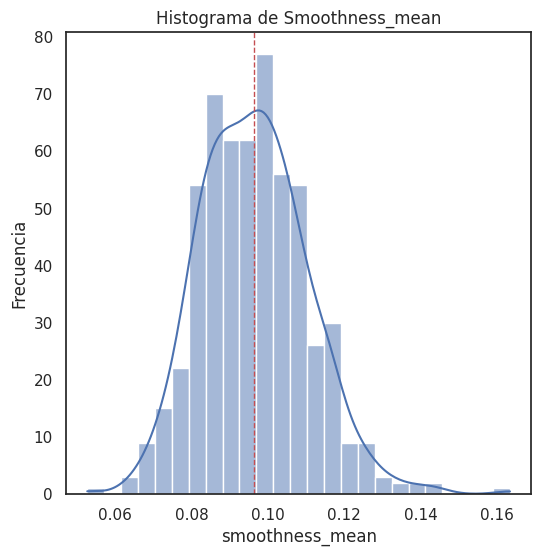

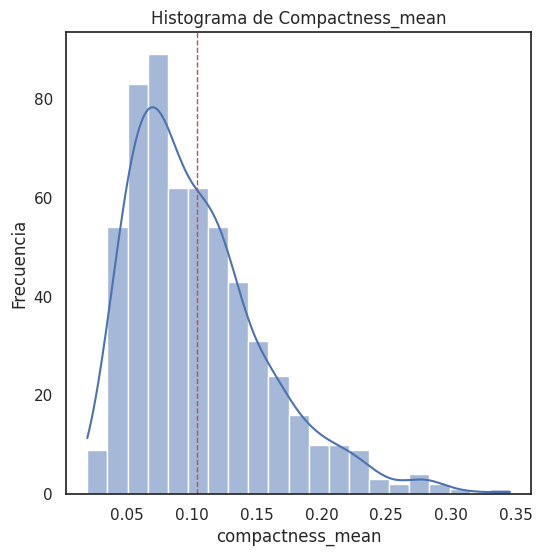

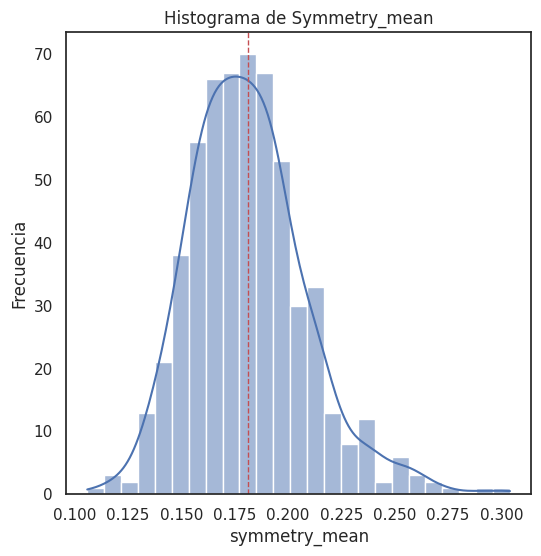

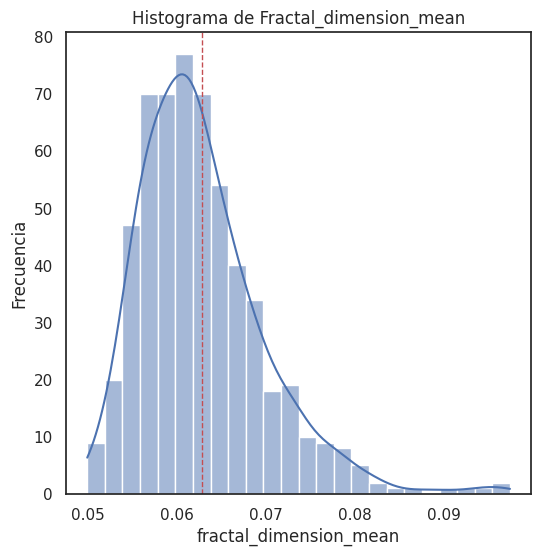

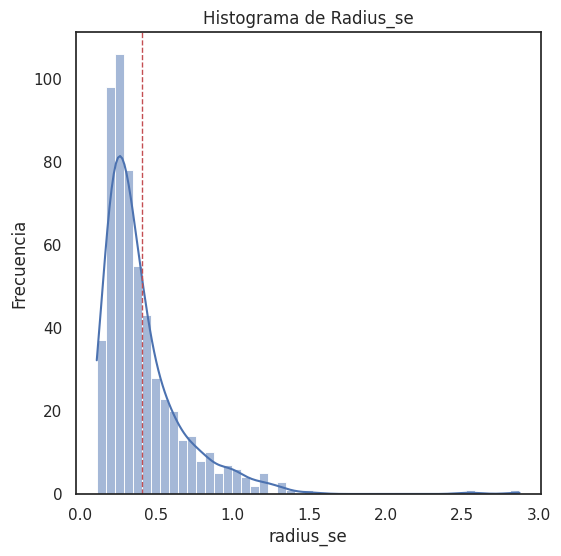

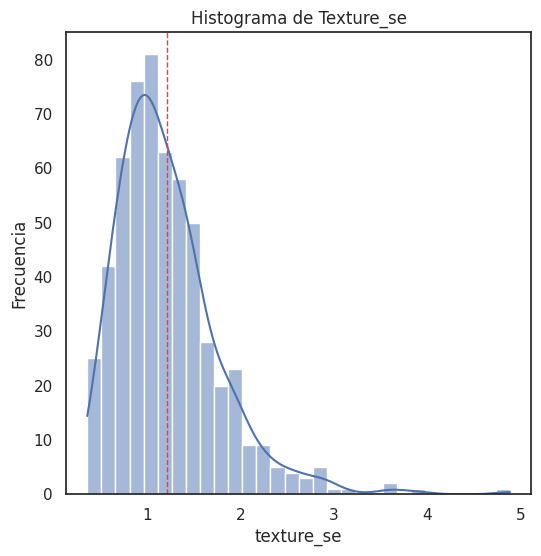

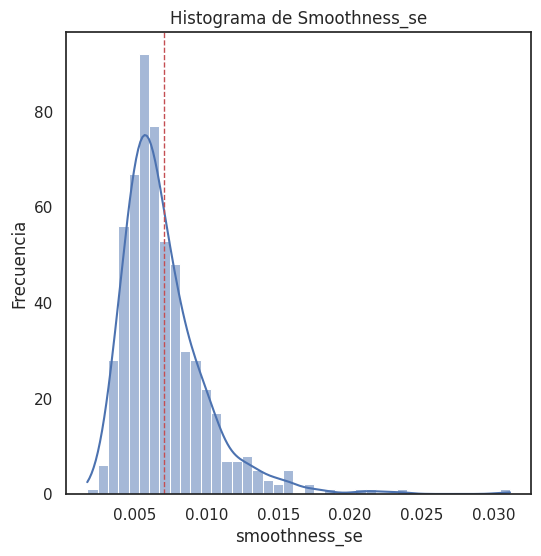

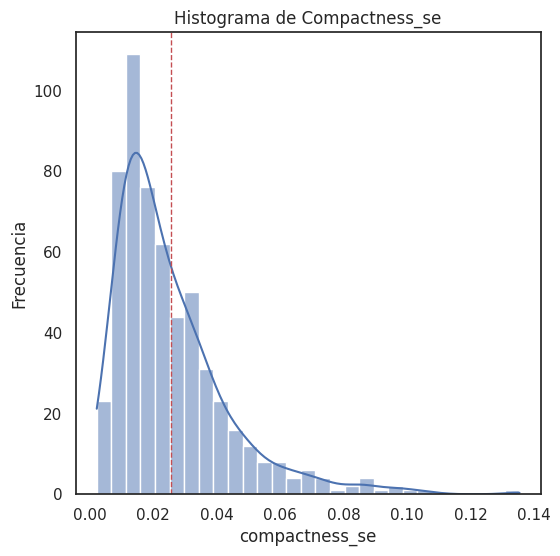

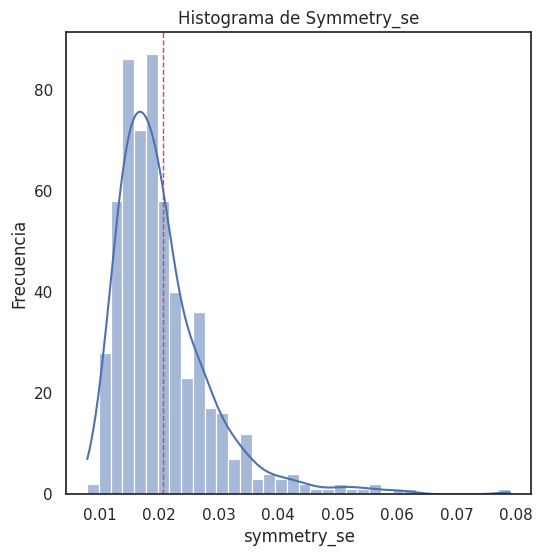

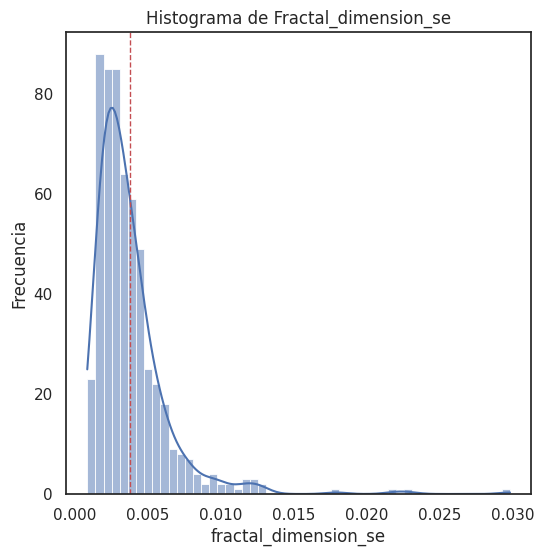

In [ ]:
columns = data_df.select_dtypes(include=np.number)
for column in columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(x=data_df[column], kde=True)
    plt.axvline(data_df[column].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.title(f'Histograma de {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

In [ ]:
# Calcular el sesgo de cada variable
sesgo = data_df.select_dtypes(include=np.number).skew()
# listar variables con sesgo positivo y guardamos en la variable skew_cols
skew_cols = sesgo[sesgo > 1].index.to_list()
print("Variables con sesgo positivo:")
print(sesgo[sesgo > 1])

Variables con sesgo positivo:
compactness_mean          1.190123
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
smoothness_se             2.314450
compactness_se            1.902221
symmetry_se               2.195133
fractal_dimension_se      3.923969
dtype: float64


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


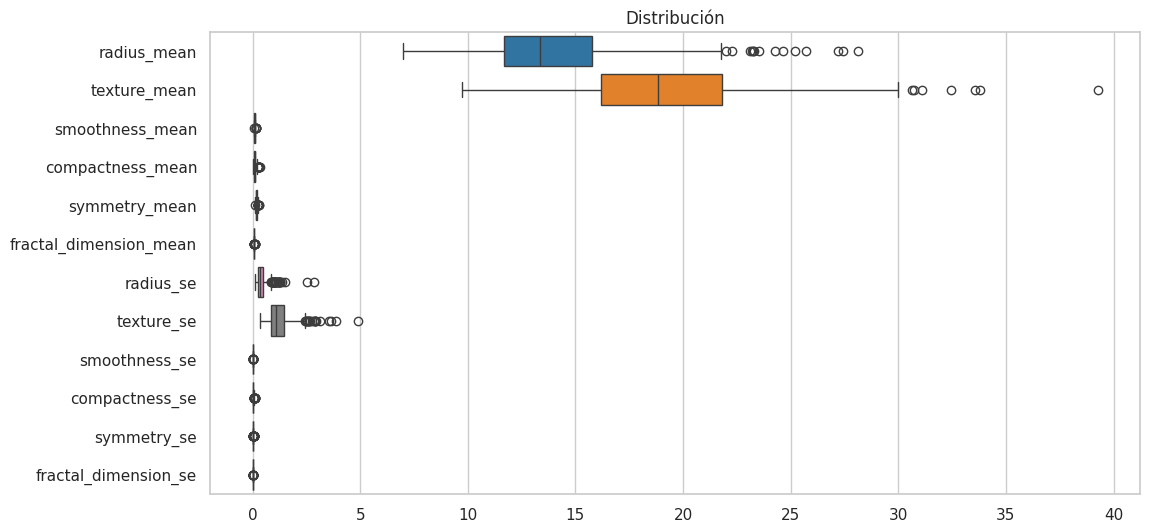

In [ ]:
titulo_grafico = "Distribución"
sns.set(style="whitegrid")
#Gráfico Boxplot a una sola variable númerica según dos categorica
plt.figure(figsize=(12,6))
sns.boxplot(data=data_df, palette="tab10", orient='h')
plt.title(titulo_grafico)
plt.show()

In [ ]:
#guardar variables en scale_cols que no se encuentren en el intervalo 0,1
scale_cols = data_df.columns[(data_df.min() < 0) | (data_df.max() > 1)]
scale_cols

Index(['radius_mean', 'texture_mean', 'radius_se', 'texture_se'], dtype='object')

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
#leemos nuevamente el archivo
data_df = pd.read_csv('data.csv')
#el id sera el indice
data_df.set_index('id', inplace=True)
data_df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...        25.380   
842517                0.07017         0.1812  ...        24.990   
84300903              0.12790         0.2069  ...        23.570   
84348301              0.10520         0.2597  ...        14.910   
84358402              0.10430         0.1809  ...        22.540   
...                       ...            ...  ...           ...   
926424                0.13890         0.1726  ...        25.450   
926682                0.09791         0.1752  ...        23.690   
926954                0.05302         0.1590  ...        18.980   
927241                0.15200         0.2397  ...        25.740   
92751                 0.00000         0.1587  ...         9.456   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0           0.16220   
842517            23.41           158.80      1956.0           0.12380   
84300903          25.53           152.50      1709.0           0.14440   
84348301          26.50            98.87       567.7           0.20980   
84358402          16.67           152.20      1575.0           0.13740   
...                 ...              ...         ...               ...   
926424            26.40           166.10      2027.0           0.14100   
926682            38.25           155.00      1731.0           0.11660   
926954            34.12           126.70      1124.0           0.11390   
927241            39.42           184.60      1821.0           0.16500   
92751             30.37            59.16       268.6           0.08996   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302              0.66560           0.7119                0.2654   
842517              0.18660           0.2416                0.1860   
84300903            0.42450           0.4504                0.2430   
84348301       

In [ ]:
#separamos las variables para realizar el entrenamiento y predicción
x = data_df.drop('diagnosis', axis=1)
#variable de salida
y = data_df['diagnosis']

print('Predictores:', x)
print('\n')
print('variable de salida:', y)

Predictores:           radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   
...               ...           ...             ...        ...   
926424          21.56         22.39          142.00     1479.0   
926682          20.13         28.25          131.20     1261.0   
926954          16.60         28.08          108.30      858.1   
927241          20.60         29.33          140.10     1265.0   
92751            7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
84

In [ ]:
#entrenamienta 80:20
from sklearn.model_selection import train_test_split
#estratificacion de smoker con las variables de train_test_split()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
print(f"Conjuntos de enetrenamiento:", x_train.shape, y_train.shape)
print(f"Conjuntos de prueba:", x_test.shape, y_test.shape)

Conjuntos de enetrenamiento: (455, 30) (455,)
Conjuntos de prueba: (114, 30) (114,)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv', index_col='id')

# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

# Verificar el tipo de datos de las columnas y convertir las que no son numéricas
non_numeric_cols = df.columns.difference(numeric_cols)
df[non_numeric_cols] = df[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Mostrar las primeras filas de DataFrame después de la conversión
print("\nDataFrame después de la conversión:")
print(df.head())


DataFrame después de la conversión:
          diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302          NaN        17.99         10.38          122.80     1001.0   
842517          NaN        20.57         17.77          132.90     1326.0   
84300903        NaN        19.69         21.25          130.00     1203.0   
84348301        NaN        11.42         20.38           77.58      386.1   
84358402        NaN        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280  

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, high_corr_cols=None):
        self.high_corr_cols = high_corr_cols

    def fit(self, X, y=None):
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
        self.high_corr_cols = to_drop
        return self

    def transform(self, X):
        X_filtered = X.drop(columns=self.high_corr_cols, errors='ignore')
        return X_filtered

#eliminar variables definidas en columns
high_corr_cols= ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                  'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                  'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                  'compactness_worst', 'concavity_worst']

# Crea el transformador
preprocessing = CorrelationFilter(high_corr_cols=high_corr_cols)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#entrenando el modelo con regresión logistica
logr_model = LogisticRegression()
logr_model.fit(x_train, y_train)
y_pred = logr_model.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

# Mostrar métricas
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9474
Precision: 0.9500
Recall: 0.9048
Confusion Matrix:
[[70  2]
 [ 4 38]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, high_corr_cols=None, skew_cols=None, scale_cols=None):
        self.high_corr_cols = high_corr_cols
        self.skew_cols = skew_cols
        self.scale_cols = scale_cols
        self.correlation_filter = CorrelationFilter(high_corr_cols)
        self.scaler = MinMaxScaler()
        self.power_transformer = PowerTransformer()

    def fit(self, x, y=None):
        #filtro de correlación
        x_filtered = self.correlation_filter.fit_transform(x)

        #predictores con sesgo
        skewness = x_filtered.skew()
        self.skew_cols = skewness[abs(skewness) > 0.5].index.tolist()

        # Identifica predictores con escala mayor a 1
        scales = x_filtered.max() - x_filtered.min()
        self.scale_cols = scales[scales > 1].index.tolist()

        return self

    def transform(self, x):
        # Aplica el filtro de correlación
        x_filtered = self.correlation_filter.transform(x)

        # Aplica la raíz cuadrada a los predictores con sesgo
        for col in self.skew_cols:
            if col in x_filtered.columns:
                x_filtered[col] = np.sqrt(x_filtered[col])

        # Aplica el escalamiento MinMax a los predictores con escala mayor a 1
        for col in self.scale_cols:
            if col in x_filtered.columns:
                x_filtered[col] = self.scaler.fit_transform(x_filtered[[col]])

        return x_filtered

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#modelo de regresión logística
logr_model2 = LogisticRegression()

#transformador modificado
custom_transformer = CustomTransformer()

#aplicamos el transformador y entrenar el modelo
x_train_transformed = custom_transformer.fit_transform(x_train)
logr_model2.fit(x_train_transformed, y_train)

#aplicamos el transformador al conjunto de prueba
x_test_transformed = custom_transformer.transform(x_test)

#realizar predicciones en el conjunto de prueba
y_pred = logr_model2.predict(x_test_transformed)

#evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

#mostrar métricas
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9298
Precision: 0.8864
Recall: 0.9286
Confusion Matrix:
[[67  5]
 [ 3 39]]


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#escalar el modelo
total_components = x.shape[1]
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)

#componentes principales que quieres retener (puedes ajustar esto)
n_components = 0.95

#instancia el objeto PCA
pca = PCA(n_components=n_components)

#transforma los datos utilizando PCA
x_pca = pca.fit_transform(x_scaled)
print("Número de componentes principales:", pca.n_components_)
print("Varianza explicada:", sum(pca.explained_variance_ratio_))

Número de componentes principales: 10
Varianza explicada: 0.9515688143366667


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#escalamos el conjunto de datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
#instancia el objeto PCA
pca = PCA()
#Ajusta el PCA al conjunto escalado
pca.fit(x_scaled)
#calcula la varianza explicada acumulativa
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()
#encuentra el número de componentes que explican el 99% de la varianza
total_components = np.argmax(explained_variance_ratio_cumulative >= 0.99) + 1
print("número de componentes que explican el 99% de la varianza:", total_components)

número de componentes que explican el 99% de la varianza: 17


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#componentes segun la varianza
n_components = 17

#construir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('logistic_regression', LogisticRegression())
])

#entrenar el modelo con el conjunto de entrenamiento
pipeline.fit(x_train, y_train)

#realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(x_test)

#métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

#resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
Confusion Matrix:
[[72  0]
 [ 2 40]]
